# Prediksi Kelulusan Mahasiswa Baru Menggunakan Machine Learning


Proyek ini bertujuan untuk membangun sebuah model machine learning yang mampu memprediksi status kelulusan calon mahasiswa berdasarkan data pendaftaran SNMPTN 2018. Dengan menggunakan data historis, disini akan mengidentifikasi faktor-faktor kunci yang paling berpengaruh terhadap keberhasilan seorang siswa. Model yang akan dikembangkan adalah RandomForestClassifier, sebuah algoritma yang kuat untuk tugas klasifikasi. Tantangan utama dalam proyek ini adalah menangani data yang tidak seimbang (imbalanced data), di mana jumlah mahasiswa yang lulus jauh lebih sedikit daripada yang tidak lulus.

## Import Library dan Memuat Data
mempersiapkan semua yang dibutuhkan

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


## Memuat Data

In [2]:
# Muat dataset dari URL
file_path = 'https://raw.githubusercontent.com/adamzakys/SourceDataset/refs/heads/main/Dataset_prediksi_kelulusan.csv'
df = pd.read_csv(file_path)

# Tampilkan 5 baris pertama
display(df.head())

,nomor_pendaftaran,JK,bidikmisi,Sekolah,Kabupaten,Provinsi,Pilihan 1,Pilihan 2,Ranking Sekolah,Nilai Mapel UN,...,X5,X6,X7,X8,X9,XT,IP Sem 1,IP Sem 2,Predikat Semester 1,Predikat Semester 2
0,4180000053,P,NaN,SMKN 1 TAMBUN SELATAN,Kab Bekasi,Jawa Barat,TEKNIK INFORMATIKA,MANAJEMEN,37,82.745854,...,10.343232,10.343232,10.343232,10.343232,7.50,70.524492,NaN,NaN,NaN,NaN
1,4180000054,L,NaN,MAN RANCAH,Kab Ciamis,Jawa Barat,ILMU POLITIK,PENDIDIKAN LUAR SEKOLAH,50,81.033269,...,10.129159,10.129159,10.129159,10.129159,10.00,71.709826,3.5,3.74,NaN,NaN
2,4180000057,L,NaN,SMAN 6 TASIKMALAYA,Kota Tasikmalaya,Jawa Barat,PENDIDIKAN GEOGRAFI,PENDIDIKAN LUAR SEKOLAH,182,81.278846,...,10.159856,10.159856,10.159856,10.159856,11.25,73.405190,3.6,3.25,NaN,NaN
3,4180000086,P,NaN,SMAN 5 CIREBON,Kota Cirebon,Jawa Barat,KESEHATAN MASYARAKAT,AGRIBISNIS,152,81.254098,...,10.156762,10.156762,10.156762,10.156762,7.50,68.527561,NaN,NaN,NaN,NaN
4,4180000137,P,NaN,SMAN 8 TASIKMALAYA,Kota Tasikmalaya,Jawa Barat,KESEHATAN MASYARAKAT,MANAJEMEN,187,80.576923,...,10.072115,10.072115,10.072115,10.072115,11.25,72.780220,NaN,NaN,NaN,NaN


## Eksplorasi dan Pemahaman Data (EDA)

### Informasi Dasar DataFrame


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3587 entries, 0 to 3586
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   nomor_pendaftaran    3587 non-null   int64  
 1   JK                   3587 non-null   object 
 2   bidikmisi            1278 non-null   object 
 3   Sekolah              3587 non-null   object 
 4   Kabupaten            3587 non-null   object 
 5   Provinsi             3587 non-null   object 
 6   Pilihan 1            3587 non-null   object 
 7   Pilihan 2            2969 non-null   object 
 8   Ranking Sekolah      3587 non-null   int64  
 9   Nilai Mapel UN       3587 non-null   float64
 10  Lulus pada Prodi     744 non-null    object 
 11  Lulus Pilihan        744 non-null    object 
 12  X1                   3587 non-null   float64
 13  X2                   3587 non-null   float64
 14  X3                   3587 non-null   float64
 15  X4                   3587 non-null   i

Total Data: Terdapat 3587 baris (entri) dan 26 kolom (fitur).

Tipe Data:

*   Kolom seperti JK, bidikmisi, Sekolah, dan lainnya memiliki tipe data object, yang menandakan data ini berisi teks (kategorikal) dan perlu diubah menjadi angka (encoding) sebelum diproses oleh model.


*   Kolom lainnya adalah numerik (int64, float64) dan bisa langsung digunakan setelah pembersihan.

Kolom lainnya adalah numerik (int64, float64) dan bisa langsung digunakan setelah pembersihan.



*   Kolom seperti bidikmisi (1278 dari 3587 data terisi), Lulus Pilihan (744 terisi), serta IP Sem 1 dan IP Sem 2 memiliki banyak sekali nilai kosong. Ini mengonfirmasi bahwa kolom-kolom ini memerlukan penanganan khusus, baik dengan cara diisi (imputation) atau dihapus.

*   Kolom Predikat Semester 1 dan Predikat Semester 2 sepenuhnya kosong (0 non-null) dan harus dihapus.








### Pengecekan Nilai Kosong

Menghitung jumlah nilai kosong (NaN) pada setiap kolom untuk merencanakan strategi imputasi atau penghapusan.

In [4]:
df.isna().sum()


,0
nomor_pendaftaran,0
JK,0
bidikmisi,2309
Sekolah,0
Kabupaten,0
Provinsi,0
Pilihan 1,0
Pilihan 2,618
Ranking Sekolah,0
Nilai Mapel UN,0


Output ini merinci jumlah nilai kosong (NaN) untuk setiap kolom dalam dataset:


*   bidikmisi (2309 kosong): Mayoritas data tidak memiliki informasi mengenai status bidikmisi. Ini perlu diisi, kemungkinan dengan asumsi "Tidak".
*   Pilihan 2 (618 kosong): Sejumlah siswa tidak mengisi pilihan kedua, yang merupakan informasi penting.
*   Lulus pada Prodi & Lulus Pilihan (2843 kosong): Ini adalah kolom target. Jumlah nilai kosong yang sama persis (2843) mengindikasikan bahwa baris-baris ini adalah untuk siswa yang tidak lulus pada seleksi.
*   IP Sem 1 & IP Sem 2 (2993 & 3028 kosong): Sebagian besar data IP semester kosong. Ini menandakan data ini tidak dapat diandalkan untuk prediksi dan kemungkinan besar harus dibuang.
*   Predikat Semester 1 & 2 (3587 kosong): Seluruh kolom ini kosong, sehingga harus dihapus.

Analisis ini memperkuat keputusan untuk menghapus kolom-kolom terkait hasil studi (IP dan Predikat) dan melakukan imputasi (pengisian nilai) pada kolom bidikmisi, Pilihan 2, dan kolom target Lulus Pilihan.








### Analisis Variabel Target


pada kolom Lulus Pilihan, yang merupakan variabel target. untuk memahami distribusi atau sebaran nilai pada kolom ini. Tujuannya adalah untuk melihat:


*   Ada kategori apa saja di dalam kolom ini (misalnya: lulus di pilihan 1, lulus di pilihan 2, atau tidak lulus).

*   Berapa jumlah mahasiswa untuk setiap kategori.

Informasi ini krusial karena jika jumlah data di satu kategori jauh lebih banyak daripada yang lain (disebut imbalanced data), ini bisa memengaruhi bagaimana model belajar nantinya. pada kasus ini saya menggunakan value_counts(dropna=False) agar nilai kosong (NaN), yang dalam konteks ini kemungkinan besar berarti "tidak lulus", juga ikut terhitung

In [5]:
# Menganalisis distribusi nilai pada kolom 'Lulus Pilihan'
# dropna=False digunakan agar nilai NaN (yang tidak lulus) juga dihitung
distribusi_target = df['Lulus Pilihan'].value_counts(dropna=False)

print("Distribusi Kelas pada Variabel Target:")
print(distribusi_target)

Distribusi Kelas pada Variabel Target:
Lulus Pilihan
NaN      2843
pil_1     696
pil_2      48
Name: count, dtype: int64


Output tersebut menunjukkan distribusi data pada kolom Lulus Pilihan:
*   NaN (2843 data): Terdapat 2.843 baris data yang tidak memiliki nilai (kosong) pada kolom Lulus Pilihan. Dalam konteks dataset ini, nilai NaN merepresentasikan mahasiswa yang tidak lulus pada pilihan pertama maupun kedua. Ini adalah kelas mayoritas.
*   pil_1 (696 data): Terdapat 696 mahasiswa yang dinyatakan lulus pada pilihan pertama mereka.
*   pil_2 (48 data): Terdapat 48 mahasiswa yang dinyatakan lulus pada pilihan kedua mereka. Ini adalah kelas minoritas.

Data ini sangat tidak seimbang (imbalanced). Jumlah mahasiswa yang tidak lulus jauh lebih dominan dibandingkan yang lulus. Kondisi ini perlu menjadi perhatian khusus karena dapat menyebabkan model cenderung lebih baik dalam memprediksi kelas mayoritas (tidak lulus) dan buruk dalam memprediksi kelas minoritas (lulus pilihan 2).



### Data Analisis

#### Distribusi Nilai Akademik Pendaftar

Visualisasi ini bertujuan untuk memahami sebaran nilai akademik kunci dari seluruh calon mahasiswa, yaitu Nilai Mapel UN dan Ranking Sekolah.

Dengan melihat histogram, dapat diidentifikasi apakah mayoritas pendaftar memiliki nilai UN yang tinggi atau rendah, serta apakah mereka cenderung berasal dari sekolah dengan ranking unggulan atau tidak. Ini memberikan gambaran umum mengenai kualitas akademik dari kohort pendaftar.



Grafik 'distribusi_akademik.png' berhasil disimpan.


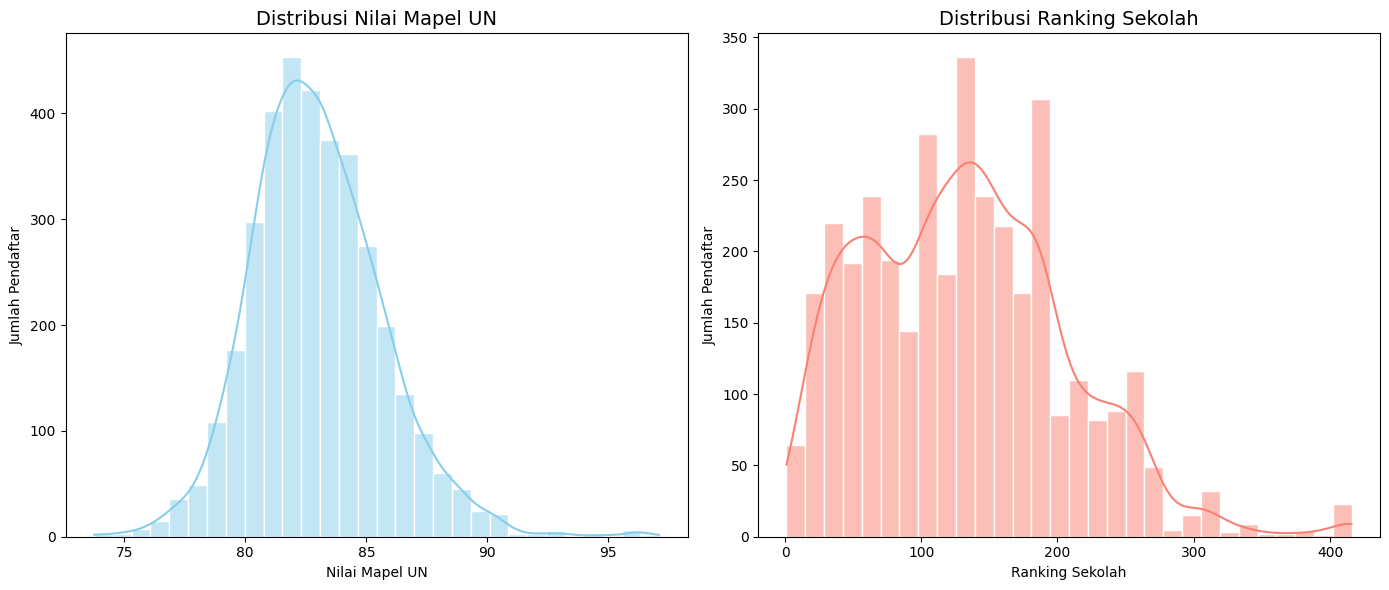

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Memuat ulang data asli untuk EDA
file_path_analisis = 'https://raw.githubusercontent.com/adamzakys/SourceDataset/refs/heads/main/Dataset_prediksi_kelulusan.csv'
df_eda = pd.read_csv(file_path_analisis)

# Membuat subplot
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.set_style("whitegrid")

# Histogram untuk Nilai Mapel UN
sns.histplot(df_eda['Nilai Mapel UN'], bins=30, kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Distribusi Nilai Mapel UN', fontsize=14)
axes[0].set_xlabel('Nilai Mapel UN')
axes[0].set_ylabel('Jumlah Pendaftar')

# Histogram untuk Ranking Sekolah
sns.histplot(df_eda['Ranking Sekolah'], bins=30, kde=True, ax=axes[1], color='salmon')
axes[1].set_title('Distribusi Ranking Sekolah', fontsize=14)
axes[1].set_xlabel('Ranking Sekolah')
axes[1].set_ylabel('Jumlah Pendaftar')

plt.tight_layout()
plt.savefig('distribusi_akademik.png')

print("Grafik 'distribusi_akademik.png' berhasil disimpan.")

#### Perbandingan Nilai Akademik Berdasarkan Status Kelulusan

Visualisasi ini membandingkan sebaran Nilai Mapel UN antara mahasiswa yang lulus (pilihan 1 & 2) dan yang tidak lulus.

Box plot ini secara visual akan menunjukkan apakah terdapat perbedaan signifikan antara nilai UN pendaftar yang diterima dan yang tidak. Jika kotak untuk kelompok "Lulus" berada jauh lebih tinggi daripada kelompok "Tidak Lulus", ini menjadi bukti kuat bahwa nilai UN adalah faktor prediktor yang penting.



/tmp/ipython-input-2146983565.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_eda['Lulus Pilihan'].fillna('Tidak Lulus', inplace=True)
/tmp/ipython-input-2146983565.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Lulus Pilihan', y='Nilai Mapel UN', data=df_eda, palette='viridis', order=['Tidak Lulus', 'Lulus Pilihan 1', 'Lulus Pilihan 2'])


Grafik 'perbandingan_nilai_kelulusan.png' berhasil disimpan.


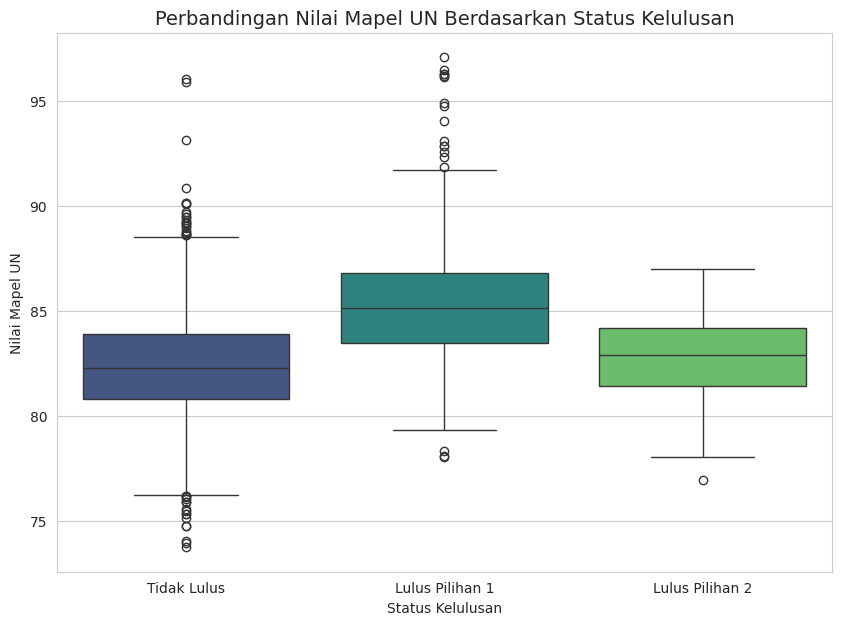

In [9]:
# Melakukan rekayasa variabel target untuk visualisasi
df_eda['Lulus Pilihan'].fillna('Tidak Lulus', inplace=True)
df_eda['Lulus Pilihan'] = df_eda['Lulus Pilihan'].replace({'pil_1': 'Lulus Pilihan 1', 'pil_2': 'Lulus Pilihan 2'})


plt.figure(figsize=(10, 7))
sns.boxplot(x='Lulus Pilihan', y='Nilai Mapel UN', data=df_eda, palette='viridis', order=['Tidak Lulus', 'Lulus Pilihan 1', 'Lulus Pilihan 2'])
plt.title('Perbandingan Nilai Mapel UN Berdasarkan Status Kelulusan', fontsize=14)
plt.xlabel('Status Kelulusan')
plt.ylabel('Nilai Mapel UN')
plt.savefig('perbandingan_nilai_kelulusan.png')

print("Grafik 'perbandingan_nilai_kelulusan.png' berhasil disimpan.")

#### Asal Provinsi dan Program Studi Paling Populer

Visualisasi ini menampilkan 10 provinsi dengan pendaftar terbanyak dan 10 program studi yang paling banyak dipilih sebagai pilihan pertama.

Grafik ini memberikan wawasan demografis dan minat pendaftar. Informasi ini dapat digunakan untuk memahami dari mana saja basis pendaftar terkuat berasal dan program studi apa yang memiliki tingkat persaingan paling tinggi berdasarkan jumlah peminat.



/tmp/ipython-input-1864554879.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_provinsi.values, y=top_10_provinsi.index, ax=axes[0], palette='plasma')
/tmp/ipython-input-1864554879.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_prodi.values, y=top_10_prodi.index, ax=axes[1], palette='magma')


Grafik 'demografi_pilihan_pendaftar.png' berhasil disimpan.


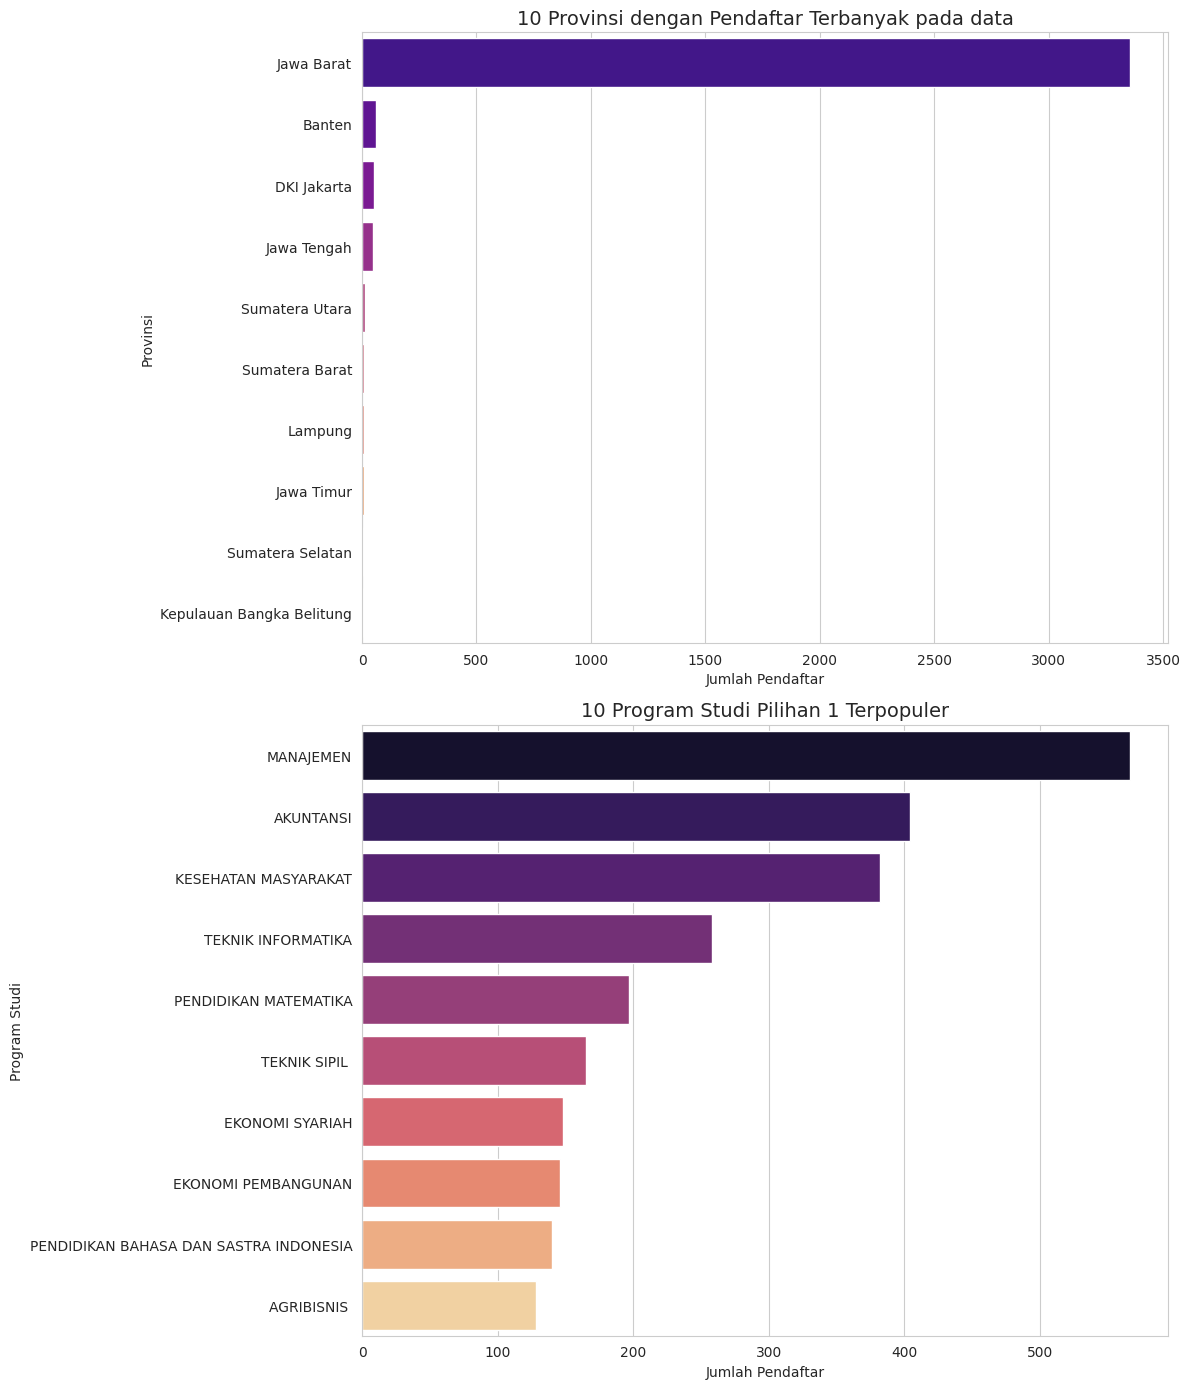

In [11]:
fig, axes = plt.subplots(2, 1, figsize=(12, 14))

# 10 Provinsi Teratas
top_10_provinsi = df_eda['Provinsi'].value_counts().head(10)
sns.barplot(x=top_10_provinsi.values, y=top_10_provinsi.index, ax=axes[0], palette='plasma')
axes[0].set_title('10 Provinsi dengan Pendaftar Terbanyak pada data', fontsize=14)
axes[0].set_xlabel('Jumlah Pendaftar')
axes[0].set_ylabel('Provinsi')

# 10 Program Studi Pilihan 1 Teratas
top_10_prodi = df_eda['Pilihan 1'].value_counts().head(10)
sns.barplot(x=top_10_prodi.values, y=top_10_prodi.index, ax=axes[1], palette='magma')
axes[1].set_title('10 Program Studi Pilihan 1 Terpopuler', fontsize=14)
axes[1].set_xlabel('Jumlah Pendaftar')
axes[1].set_ylabel('Program Studi')

plt.tight_layout()
plt.savefig('demografi_pilihan_pendaftar.png')

print("Grafik 'demografi_pilihan_pendaftar.png' berhasil disimpan.")

## Preprocessing dan Pembersihan Data

Model machine learning tidak bisa memproses data teks seperti 'pil_1' atau nilai kosong (NaN). Oleh karena itu, kolom target Lulus Pilihan perlu diubah menjadi format numerik yang bisa dipahami oleh algoritma. Proses ini terdiri dari dua tahap:
1.   Mengisi Nilai Kosong: Nilai NaN, yang sebelumnya diidentifikasi sebagai mahasiswa "tidak lulus", akan diisi terlebih dahulu. Untuk kejelasan, nilai ini akan diubah menjadi string 'tidak_lulus'.
2.   Konversi ke Numerik (Mapping): Setelah semua baris memiliki nilai, kategori-kategori tersebut akan dipetakan ke angka. Konvensi yang umum adalah:

*   'tidak_lulus' -> 0
*   'pil_1' -> 1
*   'pil_2' -> 2

Dengan begitu, variabel target menjadi sepenuhnya numerik dan siap untuk digunakan dalam pemodelan







In [7]:
# Mengisi nilai NaN dengan 'tidak_lulus' (sintaks yang disarankan)
df['Lulus Pilihan'] = df['Lulus Pilihan'].fillna('tidak_lulus')

# Membuat pemetaan (mapping) dari teks ke angka
mapping_lulus = {
    'tidak_lulus': 0,
    'pil_1': 1,
    'pil_2': 2
}

# Mengaplikasikan mapping ke kolom 'Lulus Pilihan'
df['Lulus Pilihan'] = df['Lulus Pilihan'].map(mapping_lulus)

# Menampilkan hasil setelah rekayasa untuk verifikasi
print("Distribusi Variabel Target Setelah Rekayasa (Revisi):")
print(df['Lulus Pilihan'].value_counts())

Distribusi Variabel Target Setelah Rekayasa (Revisi):
Lulus Pilihan
0    2843
1     696
2      48
Name: count, dtype: int64


Kolom target Lulus Pilihan telah berhasil di-encode secara numerik. Kategori string ('tidak_lulus', 'pil_1', 'pil_2') telah dipetakan ke tipe data integer (0, 1, 2) sehingga siap digunakan untuk pemodelan. Distribusi kelas tetap sama: 2843 sampel untuk kelas 0, 696 untuk kelas 1, dan 48 untuk kelas 2.



### Seleksi Fitur (Feature Selection)


Pada tahap ini, dilakukan pemilihan fitur (kolom) yang akan digunakan untuk melatih model. Tidak semua kolom dalam dataset relevan atau pantas untuk digunakan. Beberapa kolom perlu dibuang untuk alasan berikut:



*   Tidak Relevan: Kolom seperti nomor_pendaftaran adalah unik untuk setiap mahasiswa dan tidak memiliki pola yang bisa dipelajari oleh model untuk prediksi.


*   Kebocoran Data (Data Leakage): Kolom seperti Lulus pada Prodi, IP Sem 1, IP Sem 2, dan predikat semester adalah informasi yang baru ada setelah mahasiswa diterima dan mulai berkuliah. Menggunakan fitur ini sama saja dengan memberikan "contekan" pada model, karena tujuannya adalah memprediksi kelulusan sebelum mereka masuk.



Oleh karena itu, kolom-kolom tersebut akan dihapus dari dataset.



In [8]:
# Daftar kolom yang akan dihapus
columns_to_drop = [
    'nomor_pendaftaran',
    'Lulus pada Prodi',
    'IP Sem 1',
    'IP Sem 2',
    'Predikat Semester 1',
    'Predikat Semester 2'
]

# Menghapus kolom dari DataFrame
df.drop(columns=columns_to_drop, inplace=True)

# Menampilkan 5 baris pertama dan info untuk memeriksa hasilnya
print("Data setelah beberapa kolom dihapus:")
df.head()

Data setelah beberapa kolom dihapus:


,JK,bidikmisi,Sekolah,Kabupaten,Provinsi,Pilihan 1,Pilihan 2,Ranking Sekolah,Nilai Mapel UN,Lulus Pilihan,X1,X2,X3,X4,X5,X6,X7,X8,X9,XT
0,P,NaN,SMKN 1 TAMBUN SELATAN,Kab Bekasi,Jawa Barat,TEKNIK INFORMATIKA,MANAJEMEN,37,82.745854,0,10.308333,10.343232,1.0,0,10.343232,10.343232,10.343232,10.343232,7.50,70.524492
1,L,NaN,MAN RANCAH,Kab Ciamis,Jawa Barat,ILMU POLITIK,PENDIDIKAN LUAR SEKOLAH,50,81.033269,2,10.064033,10.129159,1.0,0,10.129159,10.129159,10.129159,10.129159,10.00,71.709826
2,L,NaN,SMAN 6 TASIKMALAYA,Kota Tasikmalaya,Jawa Barat,PENDIDIKAN GEOGRAFI,PENDIDIKAN LUAR SEKOLAH,182,81.278846,1,10.355911,10.159856,1.0,0,10.159856,10.159856,10.159856,10.159856,11.25,73.405190
3,P,NaN,SMAN 5 CIREBON,Kota Cirebon,Jawa Barat,KESEHATAN MASYARAKAT,AGRIBISNIS,152,81.254098,0,10.243750,10.156762,1.0,0,10.156762,10.156762,10.156762,10.156762,7.50,68.527561
4,P,NaN,SMAN 8 TASIKMALAYA,Kota Tasikmalaya,Jawa Barat,KESEHATAN MASYARAKAT,MANAJEMEN,187,80.576923,0,10.169643,10.072115,1.0,0,10.072115,10.072115,10.072115,10.072115,11.25,72.780220


### Penanganan Nilai Kosong pada Fitur (Imputation)


Setelah membuang kolom yang tidak relevan, langkah selanjutnya adalah memeriksa kembali apakah masih ada nilai kosong (missing values) pada fitur-fitur yang tersisa. Mengetahui kolom mana dan berapa banyak data yang kosong sangat penting untuk menentukan strategi pengisian (imputasi) yang tepat.



In [9]:
# Menghitung jumlah nilai kosong untuk setiap kolom
missing_values = df.isna().sum()

# Menampilkan kolom yang memiliki nilai kosong (lebih dari 0)
print("Jumlah nilai kosong pada setiap fitur:")
print(missing_values[missing_values > 0])

Jumlah nilai kosong pada setiap fitur:
bidikmisi    2309
Pilihan 2     618
dtype: int64


Penanganan Nilai Kosong pada Fitur (Imputation) - Lanjutan


Setiap kolom akan ditangani dengan strategi yang berbeda sesuai dengan maknanya:



*   bidikmisi: Nilai kosong (NaN) pada kolom ini kemungkinan besar berarti mahasiswa tersebut tidak mendaftar program beasiswa Bidikmisi. Oleh karena itu, nilai kosong ini akan diisi dengan angka 0 (merepresentasikan "tidak").


*   Pilihan 2: Nilai kosong di sini berarti calon mahasiswa tidak memilih program studi pilihan kedua. Nilai ini akan diisi dengan teks 'TIDAK MEMILIH' untuk menjadikannya sebuah kategori tersendiri.





In [10]:
# Mengisi nilai kosong pada kolom 'bidikmisi' dengan 0
df['bidikmisi'] = df['bidikmisi'].fillna(0)

# Mengisi nilai kosong pada kolom 'Pilihan 2' dengan 'TIDAK MEMILIH'
df['Pilihan 2'] = df['Pilihan 2'].fillna('TIDAK MEMILIH')

# Memeriksa kembali apakah masih ada nilai kosong yang tersisa di seluruh dataframe
print("Total nilai kosong setelah imputasi:", df.isna().sum().sum())

Total nilai kosong setelah imputasi: 0


### Encoding Fitur Kategorikal

Model machine learning hanya dapat memproses angka, bukan teks. Oleh karena itu, semua kolom yang masih berisi data teks (kategorikal) seperti 'JK', 'Sekolah', dan 'Pilihan 1' harus diubah menjadi format numerik.

Metode yang akan digunakan adalah Binary Encoding. Metode ini efisien untuk kolom yang memiliki sangat banyak kategori unik (seperti nama sekolah atau kabupaten) karena tidak menghasilkan terlalu banyak kolom baru, sehingga menghemat memori dan waktu komputasi.



In [11]:
!pip install category_encoders

import category_encoders as ce

# Mengidentifikasi kolom-kolom yang bertipe objek (teks)
categorical_cols = df.select_dtypes(include=['object']).columns

# Membuat instance BinaryEncoder
# drop_invariant=True digunakan untuk menghapus kolom yang tidak memiliki variasi (semua nilainya sama)
encoder = ce.BinaryEncoder(cols=categorical_cols, drop_invariant=True)

# Melakukan encoding pada data
df_encoded = encoder.fit_transform(df)

# Menampilkan 5 baris pertama dari data yang sudah di-encode
print("Data setelah proses encoding:")
df_encoded.head()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.6 MB/s eta 0:00:00
Data setelah proses encoding:


,JK_0,JK_1,bidikmisi_0,bidikmisi_1,Sekolah_0,Sekolah_1,Sekolah_2,Sekolah_3,Sekolah_4,Sekolah_5,...,X1,X2,X3,X4,X5,X6,X7,X8,X9,XT
0,0,1,0,1,0,0,0,0,0,0,...,10.308333,10.343232,1.0,0,10.343232,10.343232,10.343232,10.343232,7.50,70.524492
1,1,0,0,1,0,0,0,0,0,0,...,10.064033,10.129159,1.0,0,10.129159,10.129159,10.129159,10.129159,10.00,71.709826
2,1,0,0,1,0,0,0,0,0,0,...,10.355911,10.159856,1.0,0,10.159856,10.159856,10.159856,10.159856,11.25,73.405190
3,0,1,0,1,0,0,0,0,0,0,...,10.243750,10.156762,1.0,0,10.156762,10.156762,10.156762,10.156762,7.50,68.527561
4,0,1,0,1,0,0,0,0,0,0,...,10.169643,10.072115,1.0,0,10.072115,10.072115,10.072115,10.072115,11.25,72.780220


Kolom-kolom teks asli (seperti 'JK', 'Sekolah', 'Kabupaten', dll.) telah digantikan oleh serangkaian kolom baru (contoh: JK_0, JK_1, Sekolah_0, dst.). Kolom-kolom baru ini berisi representasi biner (0 dan 1) dari data teks sebelumnya.

Hasil akhirnya adalah sebuah DataFrame dengan 49 kolom yang seluruhnya berisi data numerik. Dengan ini, tahap Preprocessing dan Pembersihan Data telah selesai, dan dataset kini sepenuhnya siap untuk tahap pembangunan model.



## Pembangunan Model (Modeling)


### Pemisahan Data (Train-Test Split)


Sebelum model dilatih, dataset perlu dibagi menjadi dua bagian:



*   Data Latih (Training Data): Sebagian besar data (80%) yang akan digunakan untuk "mengajari" model dalam mengenali pola.


*   Data Uji (Testing Data): Sisa data (20%) yang disimpan dan akan digunakan untuk menguji seberapa baik model yang sudah dilatih dalam membuat prediksi pada data yang belum pernah dilihat sebelumnya.


Pemisahan ini penting untuk evaluasi yang objektif. Parameter stratify digunakan untuk memastikan proporsi setiap kelas kelulusan (0, 1, dan 2) pada data latih dan data uji sama dengan proporsi pada dataset aslinya. Ini sangat krusial untuk kasus data tidak seimbang.



In [12]:
from sklearn.model_selection import train_test_split

# Memisahkan fitur (X) dan target (y)
X = df_encoded.drop('Lulus Pilihan', axis=1)
y = df_encoded['Lulus Pilihan']

# Membagi data menjadi 80% data latih dan 20% data uji
# stratify=y memastikan proporsi kelas target tetap sama di kedua set
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Menampilkan ukuran (shape) dari setiap set data untuk verifikasi
print("Ukuran X_train:", X_train.shape)
print("Ukuran X_test:", X_test.shape)
print("Ukuran y_train:", y_train.shape)
print("Ukuran y_test:", y_test.shape)

Ukuran X_train: (2869, 48)
Ukuran X_test: (718, 48)
Ukuran y_train: (2869,)
Ukuran y_test: (718,)


Output tersebut menunjukkan bahwa dataset telah berhasil dibagi. Data latih (X_train) terdiri dari 2869 baris data, dan data uji (X_test) terdiri dari 718 baris, sesuai dengan rasio pembagian 80:20. Jumlah 48 kolom fitur konsisten di kedua set data.



In [13]:
!pip install imbalanced-learn

from imblearn.over_sampling import SMOTE
import pandas as pd

# 2. Tampilkan distribusi kelas SEBELUM SMOTE (untuk perbandingan)
print("Distribusi kelas sebelum SMOTE:")
print(pd.Series(y_train).value_counts())

# 3. Inisialisasi SMOTE
# random_state untuk memastikan hasilnya bisa direproduksi
smote = SMOTE(random_state=42)

# 4. Terapkan SMOTE hanya pada data latih
# Ini akan membuat sampel baru untuk kelas 1 dan 2 agar jumlahnya sama dengan kelas 0
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# 5. Tampilkan distribusi kelas SETELAH SMOTE
print("\nDistribusi kelas setelah SMOTE:")
print(pd.Series(y_train_smote).value_counts())

# 6. Verifikasi ukuran data latih yang baru
print("\nUkuran X_train setelah SMOTE:", X_train_smote.shape)

Distribusi kelas sebelum SMOTE:
Lulus Pilihan
0    2274
1     557
2      38
Name: count, dtype: int64

Distribusi kelas setelah SMOTE:
Lulus Pilihan
0    2274
1    2274
2    2274
Name: count, dtype: int64

Ukuran X_train setelah SMOTE: (6822, 48)


### Pelatihan Model (Model Training)


Pada langkah ini, model machine learning akan "belajar" dari data latih (X_train dan y_train) yang sudah di siapkan. Algoritma yang digunakan adalah RandomForestClassifier.

Karena data tidak seimbang, sebuah parameter penting yaitu class_weight='balanced' akan digunakan. Parameter ini secara otomatis akan memberikan bobot yang lebih tinggi pada kelas minoritas (lulus pilihan 1 dan 2). Tujuannya adalah agar model tidak mengabaikan kelas-kelas tersebut dan lebih sensitif dalam memprediksinya, meskipun jumlah datanya sedikit.



In [14]:
from sklearn.ensemble import RandomForestClassifier

# Membuat instance model RandomForestClassifier
# class_weight='balanced' untuk menangani data tidak seimbang
model = RandomForestClassifier(random_state=42, class_weight='balanced')

# Melatih model menggunakan data latih
model.fit(X_train_smote, y_train_smote)

print("Model RandomForestClassifier berhasil dilatih.")

Model RandomForestClassifier berhasil dilatih.


## Evaluasi Model

### Analisis Metrik Klasifikasi

Tahap evaluasi ini bertujuan untuk mengukur performa model pada data uji—data yang belum pernah "dilihat" sebelumnya. Pertama, menggunakan model yang sudah dilatih untuk membuat prediksi pada X_test.

Selanjutnya, hasil prediksi tersebut akan dibandingkan dengan jawaban yang sebenarnya (y_test) menggunakan Classification Report. Laporan ini akan menampilkan metrik-metrik penting:



*   Precision: Tingkat akurasi dari prediksi yang dibuat. Dari semua yang diprediksi sebagai kelas X, berapa persen yang benar?


*   Recall (Sensitivity): Kemampuan model untuk menemukan kembali data dari suatu kelas. Dari semua data asli kelas X, berapa persen yang berhasil ditemukan?

*   F1-Score: Rata-rata harmonik dari Precision dan Recall. Metrik ini sangat berguna untuk data tidak seimbang.







In [16]:
from sklearn.metrics import classification_report

# Membuat prediksi pada data uji
y_pred = model.predict(X_test)

# Menghasilkan dan menampilkan classification report
report = classification_report(y_test, y_pred, target_names=['Tidak Lulus (0)', 'Lulus Pil 1 (1)', 'Lulus Pil 2 (2)'])

print("Laporan Hasil Klasifikasi:")
print(report)

Laporan Hasil Klasifikasi:
                 precision    recall  f1-score   support

Tidak Lulus (0)       0.94      0.95      0.94       569
Lulus Pil 1 (1)       0.77      0.78      0.78       139
Lulus Pil 2 (2)       0.00      0.00      0.00        10

       accuracy                           0.90       718
      macro avg       0.57      0.58      0.57       718
   weighted avg       0.89      0.90      0.90       718



Laporan ini menyajikan metrik evaluasi kinerja model Random Forest Classifier pada data uji, setelah model dilatih menggunakan data latih yang telah diseimbangkan dengan metode SMOTE.

*   Performa pada Kelas Mayoritas (Tidak Lulus): Model menunjukkan kinerja yang sangat tinggi untuk kelas Tidak Lulus (0). Dengan nilai F1-Score sebesar 0.94, model ini sangat efektif dan dapat diandalkan dalam mengidentifikasi mahasiswa yang tidak lulus.

*   Performa pada Kelas Minoritas (Lulus Pil 1): Untuk kelas Lulus Pil 1 (1), model menunjukkan kinerja yang moderat dengan F1-Score 0.78. Nilai ini merefleksikan keseimbangan antara precision (0.77) dan recall (0.78), yang mengindikasikan bahwa model cukup mampu mengidentifikasi mahasiswa yang lulus di pilihan pertama.

*   Performa pada Kelas Minoritas Ekstrem (Lulus Pil 2): Model sepenuhnya gagal untuk mengidentifikasi kelas Lulus Pil 2 (2). Seluruh metrik evaluasi—precision, recall, dan f1-score—menunjukkan nilai 0.00. Hal ini menandakan bahwa tidak ada satu pun prediksi yang benar untuk kelas ini, yang disebabkan oleh jumlah sampel yang sangat terbatas dalam dataset.

Secara keseluruhan, akurasi sebesar 90% bersifat menyesatkan (misleading) karena didominasi oleh keberhasilan model dalam memprediksi kelas mayoritas, sementara menyembunyikan kegagalan total pada kelas minoritas ekstrem.



### Analisis Fitur Penting (Feature Importance)


Setiap pohon keputusan dalam algoritma Random Forest menghitung seberapa besar kontribusi setiap fitur dalam mengurangi impurity atau kesalahan prediksi. Feature Importance adalah rata-rata dari kontribusi tersebut di semua pohon.

Dengan memvisualisasikan fitur-fitur terpenting, kita dapat melihat faktor apa saja (misalnya, ranking sekolah, nilai mapel, atau pilihan prodi) yang paling berpengaruh menurut model dalam menentukan kelulusan.



/tmp/ipython-input-3103375209.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


Grafik 'feature_importance.png' berhasil disimpan.


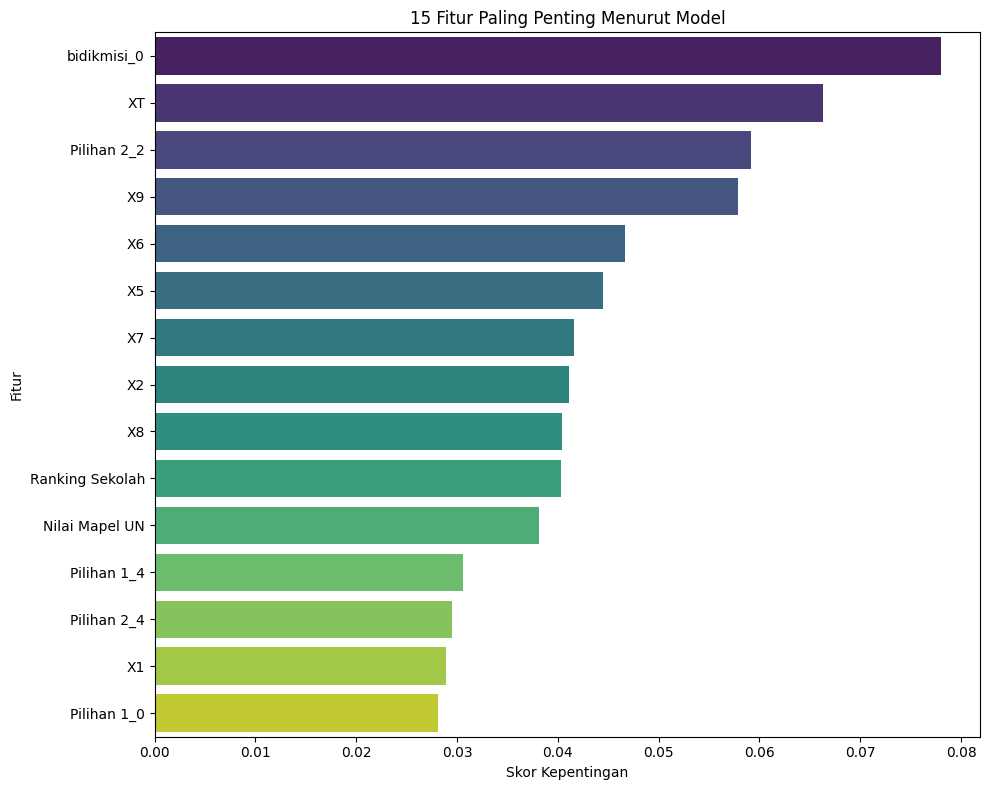

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mendapatkan skor kepentingan fitur dari model
importances = model.feature_importances_

# Membuat DataFrame untuk memudahkan visualisasi
feature_importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': importances
}).sort_values('importance', ascending=False)

# Membuat plot
plt.figure(figsize=(10, 8))
sns.barplot(
    x='importance',
    y='feature',
    data=feature_importance_df.head(15), # Mengambil 15 fitur teratas
    palette='viridis'
)

plt.title('15 Fitur Paling Penting Menurut Model')
plt.xlabel('Skor Kepentingan')
plt.ylabel('Fitur')
plt.tight_layout() # Menyesuaikan layout agar tidak terpotong
plt.savefig('feature_importance.png')

print("Grafik 'feature_importance.png' berhasil disimpan.")

Diagram ini mengilustrasikan tingkat kepentingan (importance) dari setiap fitur dalam proses pengambilan keputusan model Random Forest. Skor kepentingan mengukur seberapa besar kontribusi sebuah fitur dalam mengurangi ketidakmurnian (impurity) di seluruh pohon keputusan yang dibangun.



*   Fitur Paling Berpengaruh: Hasil analisis menunjukkan bahwa serangkaian fitur yang tidak teridentifikasi, yaitu X1, X2, XT, X3, X5, dan X4, merupakan prediktor dengan pengaruh paling signifikan terhadap hasil prediksi model.

*   Fitur Lainnya: Fitur yang dapat diinterpretasikan seperti Nilai Mapel UN dan Ranking Sekolah juga memiliki kontribusi, namun skor kepentingannya jauh lebih rendah dibandingkan dengan fitur-fitur 'X'.


*   Keterbatasan Interpretasi: Ketergantungan model yang sangat tinggi pada fitur-fitur 'X' yang tidak diketahui maknanya menjadi sebuah keterbatasan fundamental. Meskipun fitur-fitur ini kuat secara prediktif, ketidakmampuan untuk menginterpretasikannya menjadikan model ini sebagai "kotak hitam" (black box). Hal ini menimbulkan tantangan dalam memvalidasi logika di balik keputusan model dan membangun kepercayaan terhadap hasilnya.



##